### "IMDB Dataset of 50K Movie Reviews" Project with LSTM


#### 1. Business Problem:

- Kullanıcıların filmler hakkında yazdıkları yorumları(cümleleri) olumlu(1) ya da olumsuz(0) olacak şekilde sınıflandıracak bir model geliştirmek buradaki amacımız.
  
- Tabi burada binary sınıflandırma yapmış olacağız çünkü sonuç olarak gelebilecek 2 sınıfımız(1 ya da 0) var.

- IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

- This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. This dataset contains 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

#### 2. Data Understanding:

In [1]:
######################### Import İşlemleri ########################################

import matplotlib.pyplot as plt
import numpy as np

# Model için kullanılacak olan kütüphaneler
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Warningleri kapatmak için kullanılmaktadır
import warnings
warnings.filterwarnings('ignore')

In [2]:
# veri setini yükleme

max_features = 10000 # en çok kullanılan 10000 kelimeyi dikkate alalım
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

In [3]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

- Bu veri seti kullanıcıların filmlere yaptığı yorumlardan oluşmaktadır. Cümleleri olduğu gibi nöral network'e veremeyeceğimiz için tensorflow bu cümleleri sayısal değerlere çevirmiş ve bu sayısal değerleri listeler halinde saklamaktadır. Ve y değerleri de bu cümlelerin sonuç olarak olumlu bir içeriğe mi yoksa olumsuz içeriğe mi sahip olduğuna göre 1 ve 0 değerlerinden oluşmaktadır.

In [4]:
y_train[0]

1

In [5]:
x_train[34]

[1,
 111,
 28,
 3431,
 15,
 2,
 475,
 455,
 4127,
 9,
 6,
 4821,
 1677,
 125,
 14,
 9,
 24,
 66,
 283,
 151,
 4,
 4197,
 2153,
 1023,
 7,
 4821,
 4064,
 93,
 134,
 132,
 1918,
 2773,
 537,
 53,
 1564,
 2,
 18,
 22,
 1188,
 11,
 4,
 333,
 320,
 7,
 4,
 5819,
 2,
 475,
 455,
 4127,
 62,
 30,
 128,
 2209,
 17,
 6,
 682,
 251,
 2,
 7,
 2,
 1837,
 45,
 6,
 65,
 44,
 2970,
 23,
 31,
 508,
 6,
 2,
 6633,
 2682,
 8,
 8085,
 4,
 341,
 7,
 94,
 3678,
 23,
 4,
 85,
 6,
 6636,
 2,
 6633,
 2682,
 8,
 516,
 4,
 4127,
 159,
 12,
 70,
 2308,
 101,
 53,
 456,
 1038,
 2,
 455,
 4127,
 5668,
 6,
 55,
 1332,
 22,
 94,
 2,
 221,
 1008,
 643,
 2262,
 34,
 5598,
 354,
 5,
 5400,
 6519,
 10,
 10,
 3310,
 2243,
 5705,
 745,
 2173,
 3267,
 6,
 7735,
 113,
 2,
 2844,
 2,
 4540,
 2,
 8116,
 125,
 4,
 8064,
 5225,
 7,
 3476,
 68,
 2180,
 220,
 630,
 11,
 1690,
 54,
 2,
 768,
 26,
 2982,
 34,
 6,
 87,
 428,
 3310,
 21,
 6,
 455,
 4127,
 2957,
 11,
 4,
 1851,
 7,
 58,
 8,
 570,
 4,
 3310,
 103,
 14,
 5705,
 461,
 34

In [6]:
y_train[34]

0

#### 3. Data Preparation:

In [7]:
len(x_train[0])

218

In [8]:
len(x_train[1])

189

In [9]:
# yukarıda gördüğümüz gibi cümlelerin uzunlukları birbirinden farklı, bunların uzunluklarını eşit duruma getirmemiz gerekiyor
# bunun için de padding işlemi yapıyoruz

############# Padding İşlemi ###############
maxlen = 100 # her yorumun uzunluğu 100 kelime olacak 
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [10]:
print(f"Eğitim setinin boyutu: {x_train.shape}, {y_train.shape}")

Eğitim setinin boyutu: (25000, 100), (25000,)


In [11]:
print(f"Test setinin boyutu: {x_test.shape}, {y_test.shape}")

Test setinin boyutu: (25000, 100), (25000,)


#### 4. Modelling:

In [12]:
# modelling

max_features = 10000
maxlen = 100

def build_lstm_model():

    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = 64, input_length = maxlen))
    model.add(LSTM(units = 64))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation = "sigmoid")) # 2 sınıf old. için sigmoid kullanılır

    # derleme(compile)
    model.compile(optimizer = Adam(learning_rate = 0.0001),
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])

    return model 

model = build_lstm_model()

In [13]:
# Modeli manuel olarak build edin
model.build(input_shape=(None, maxlen))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)                

In [16]:
# training 

history = model.fit(x_train, y_train, 
                    epochs = 10, 
                    batch_size = 16, 
                    validation_split = 0.2, 
                    callbacks = [early_stopping])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.5623 - loss: 0.6658 - val_accuracy: 0.8068 - val_loss: 0.4180
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.8526 - loss: 0.3654 - val_accuracy: 0.8448 - val_loss: 0.3608
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.8963 - loss: 0.2706 - val_accuracy: 0.8400 - val_loss: 0.3579
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9174 - loss: 0.2245 - val_accuracy: 0.8374 - val_loss: 0.4038
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9377 - loss: 0.1827 - val_accuracy: 0.8398 - val_loss: 0.4020


- Burada gelen accuracy ve validation accuracy değerlerini incelediğimizde modelin veriyi ezberlemeye başladığını yani overfittingin gerçekleşmeye başladığını bu nedenle eğitimin 5.epoch'ta durduğunu görebiliriz.

#### 5. Evaluation:

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8426 - loss: 0.3637
Test loss: 0.3635307550430298, Test accuracy: 0.8409199714660645


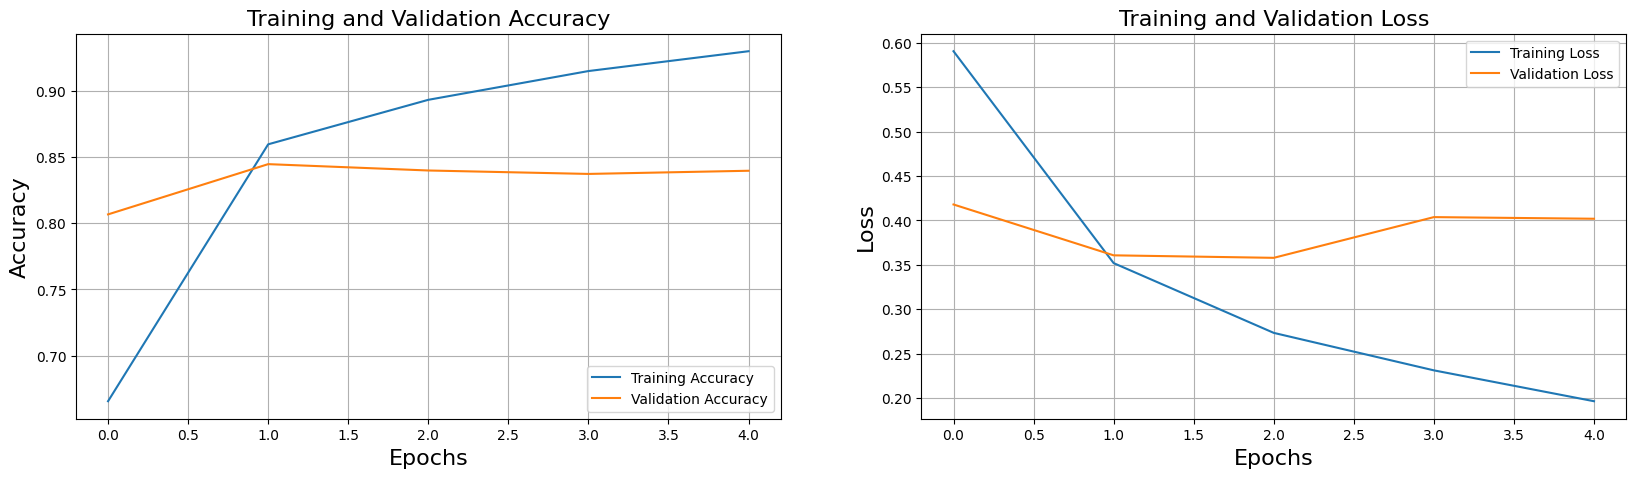

In [18]:
####################################################
# Accuracy Graph
####################################################

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True)
plt.title('Training and Validation Accuracy', fontsize=16)


####################################################
# Loss Graph
####################################################

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Training and Validation Loss', fontsize=16)
plt.grid(True)
plt.show()

- Bu iki grafiği inceleyecek olursak validation ve training değerlerinin birlikte hareket etmediğini görüyoruz bu durum da daha önce yapmış olduğumuz overfitting tespitini doğrulamış oluyor.